In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
#loading the dataset
df=pd.read_excel('Datasets/Bank_Personal_Loan_Modelling.xlsx')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.describe

<bound method NDFrame.describe of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  On

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df=df.drop(columns=['ID','ZIP Code'])

In [8]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [9]:
print("Percentage of personal loan approved:",(480/5000)*100)
print("Percentage of personal loan not approved:",(4520/5000)*100)

Percentage of personal loan approved: 9.6
Percentage of personal loan not approved: 90.4


## Exploratory Data Analysis

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

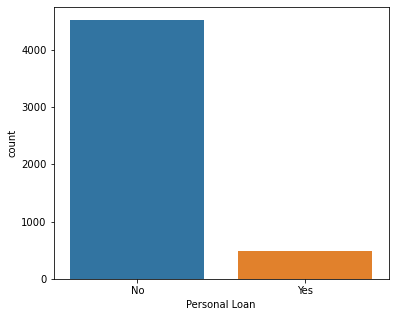

In [11]:
fig=plt.figure(figsize=(6,5)) 
ax=fig.add_subplot(1,1,1) 
sns.countplot('Personal Loan',data=df)
ax.set_xticklabels(['No','Yes'])

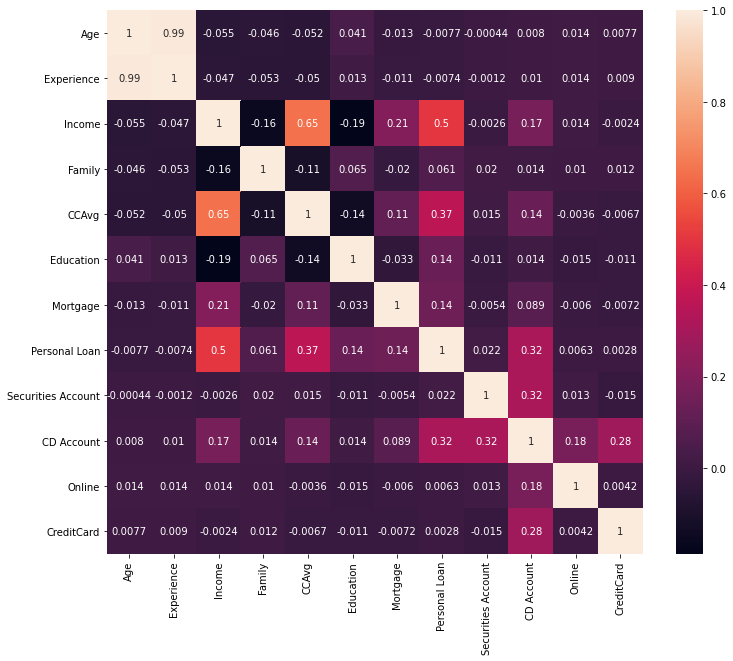

In [12]:
#correlation among features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


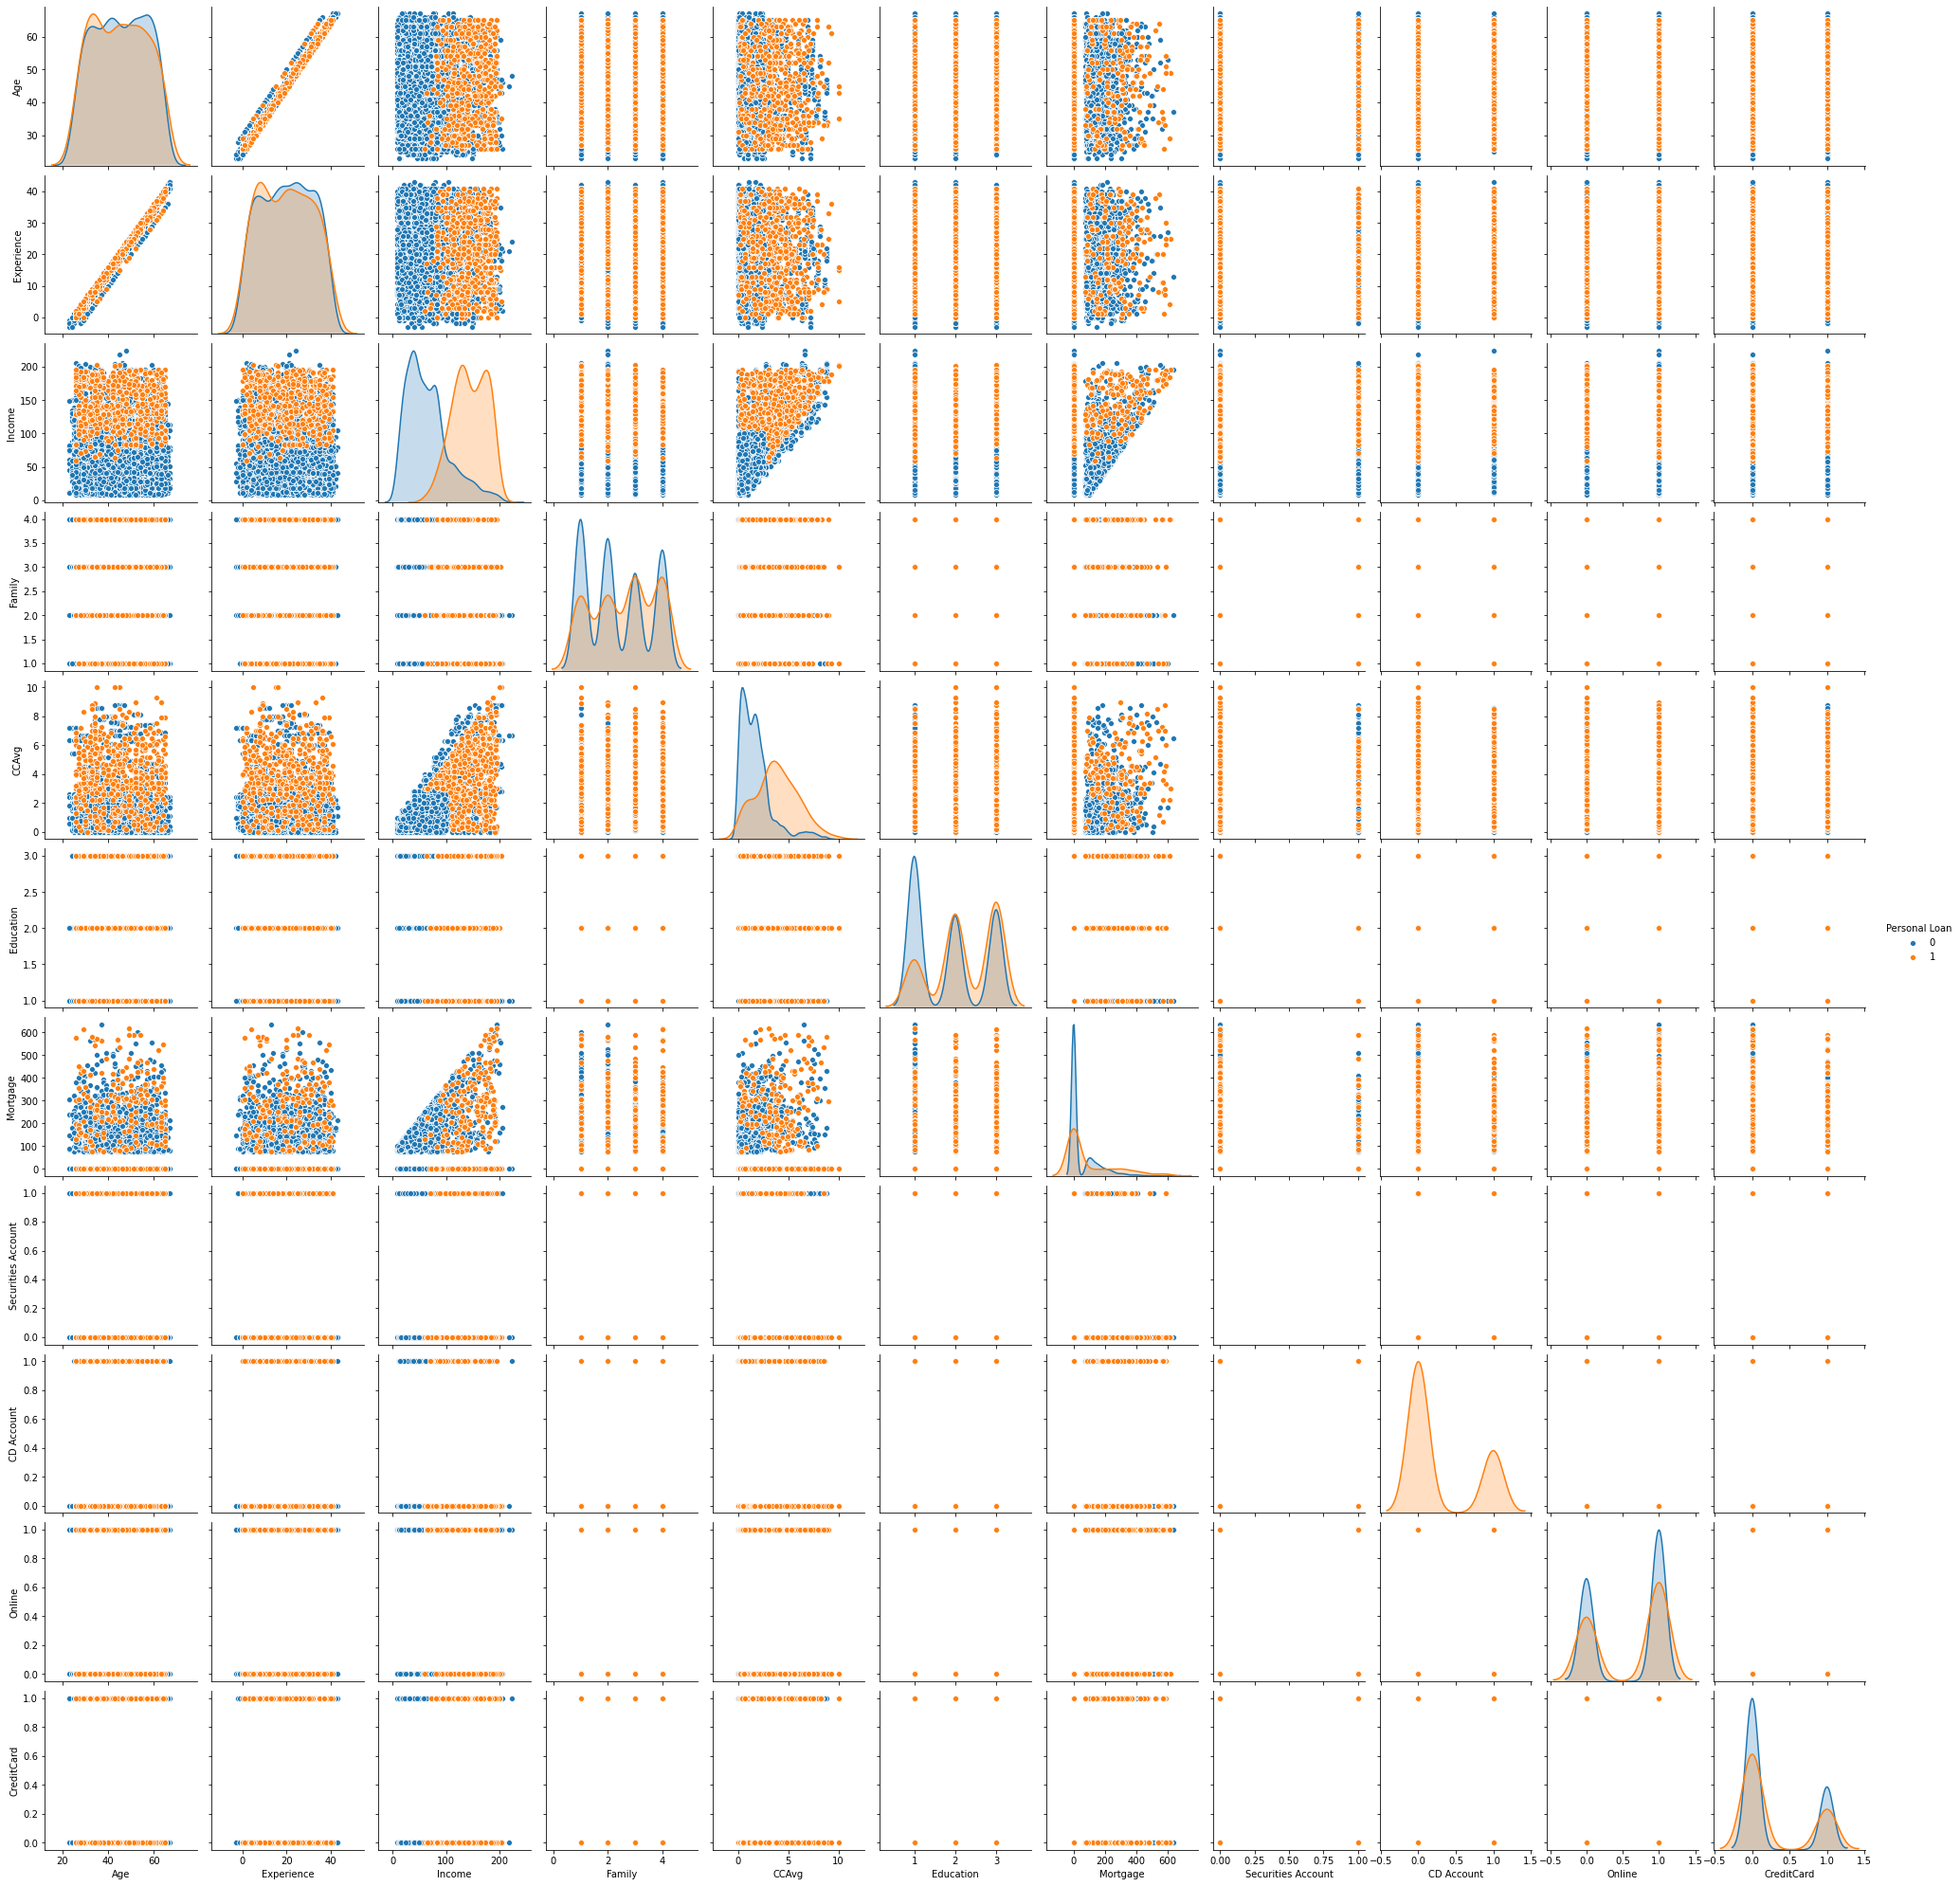

In [13]:
sns.pairplot(df,hue='Personal Loan')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


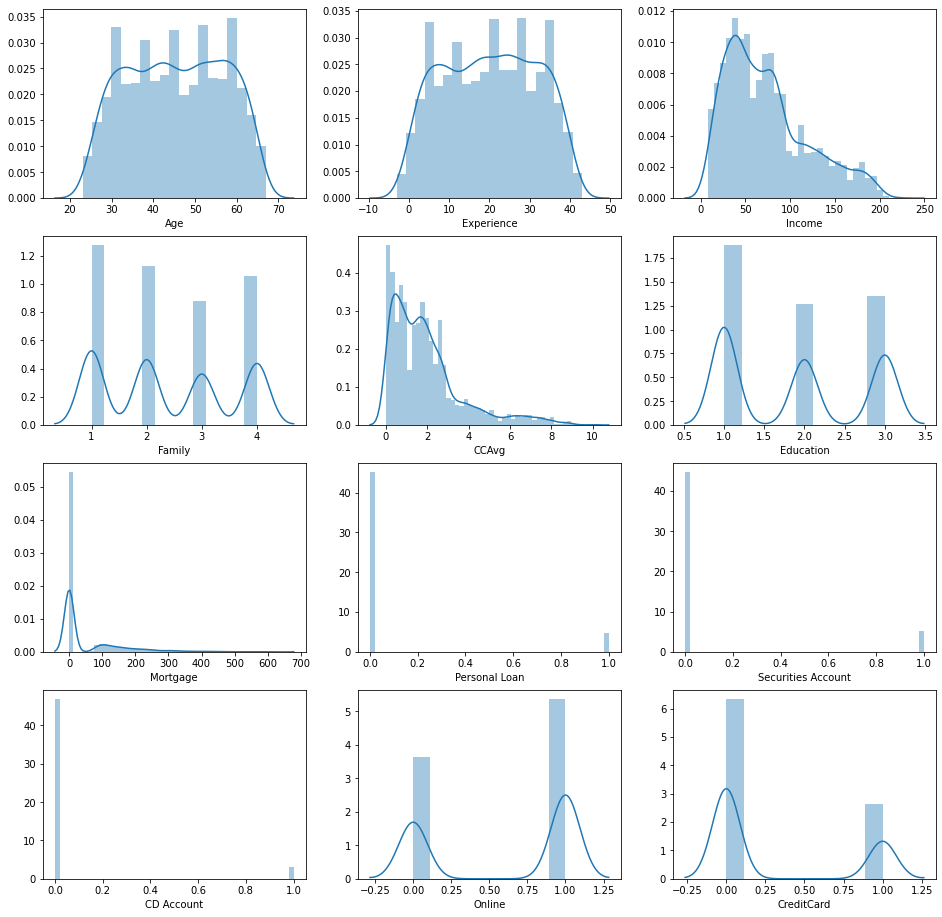

In [14]:
#univariate distribution
i=1

fig=plt.figure(figsize=(16,16))
for column in df.columns:
    plt.subplot(4,3,i)
    plt.xlabel(column)
    sns.distplot(df[column])
    i=i+1
plt.show()

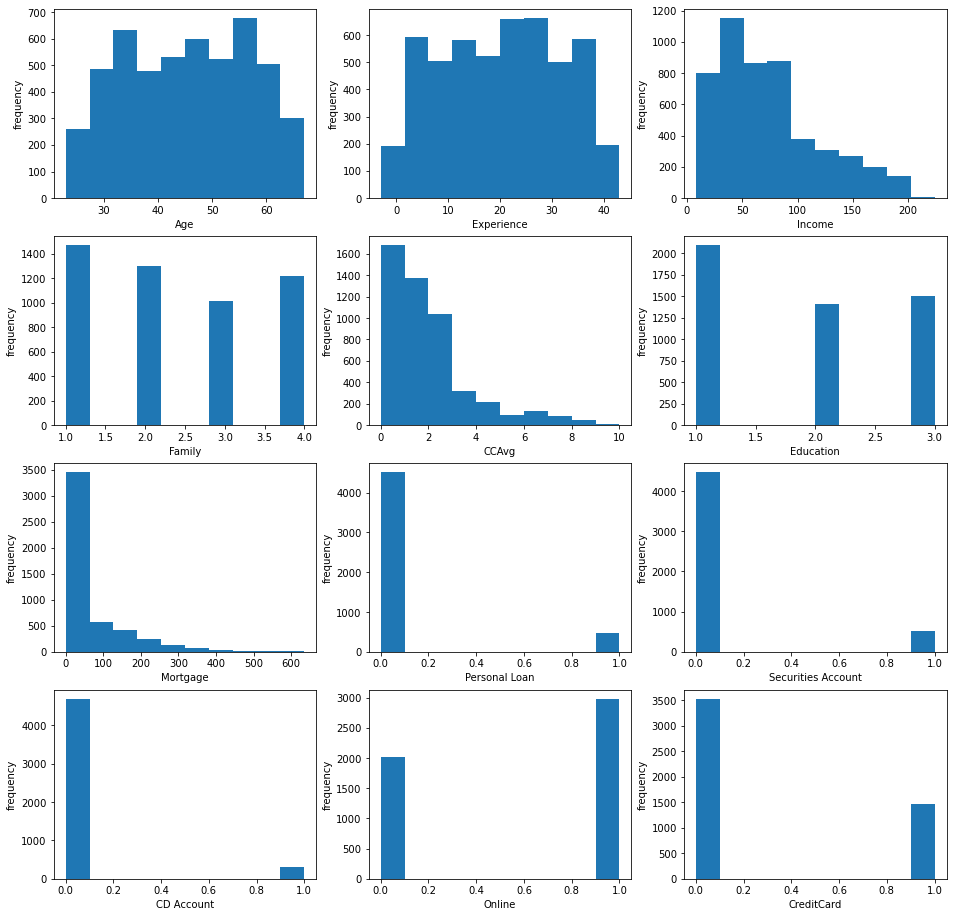

In [15]:
#histogram plot for the features
i=1
fig=plt.figure(figsize=(16,16))
for column in df.columns:
    plt.subplot(4,3,i)
    plt.xlabel(column)
    plt.hist(df[column])
    plt.ylabel('frequency')
    i=i+1
plt.show()

In [16]:
#Age is highly correlated to Experience;so dropping Age
df=df.drop(columns=['Age'])

<Figure size 864x1008 with 0 Axes>

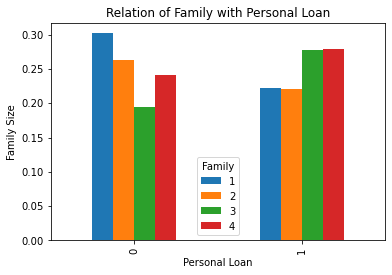

In [17]:
#relationship of family size with peronal loan
plt.figure(figsize=(12,14))
data=pd.crosstab(df['Personal Loan'], df['Family']) 
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar')
plt.ylabel('Family Size')
plt.title('Relation of Family with Personal Loan')
plt.show()

<Figure size 864x1008 with 0 Axes>

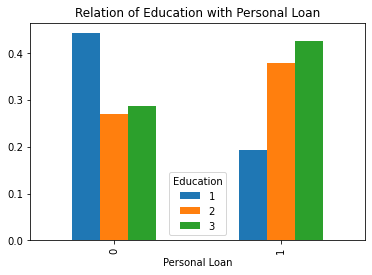

In [18]:
#relationship of education with peronal loan
plt.figure(figsize=(12,14))
data=pd.crosstab(df['Personal Loan'], df['Education']) 
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar')
plt.title('Relation of Education with Personal Loan')
plt.show()

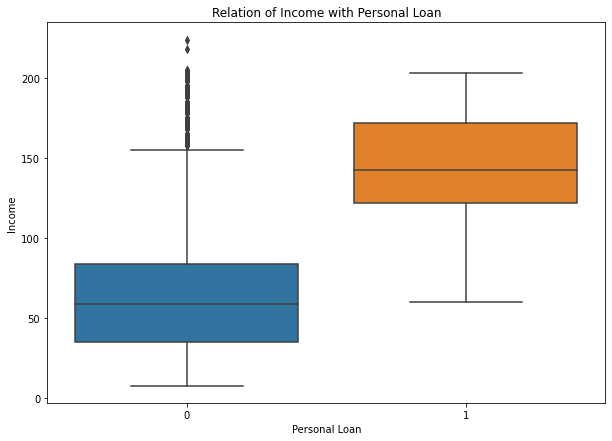

In [19]:
#income statistics as per personal loan
plt.figure(figsize=(10,7))
sns.boxplot(df['Personal Loan'], df['Income'])
plt.title('Relation of Income with Personal Loan')
plt.show()

In [20]:
#feature and target dataframe
x=df.drop(columns=['Personal Loan'])
y=df['Personal Loan']

In [21]:
#classify function with prerequisites for model
def classify(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3)
    model.fit(x_train,y_train)
    print("Training Accuracy: ",round(model.score(x_train, y_train)*100,3))
    print("Testing Accuracy: ",round(model.score(x_test, y_test)*100,3))
    score=cross_val_score(model, x, y, cv=5)
    print("Model Accuracy for cross validation:",round(np.mean(score)*100,3))

In [22]:
#compaing different classification model performance
classifiers=[LogisticRegression(solver='liblinear'),
             KNeighborsClassifier(n_neighbors=9),
             GaussianNB(),
             SVC(kernel='linear', C=0.01, probability=True),
             DecisionTreeClassifier(max_depth=4)]

for classifier in classifiers:
    print(classifier,':')
    classify(classifier,x,y)
    print('\n')

LogisticRegression(solver='liblinear') :
Training Accuracy:  95.257
Testing Accuracy:  94.267
Model Accuracy for cross validation: 94.92


KNeighborsClassifier(n_neighbors=9) :
Training Accuracy:  92.486
Testing Accuracy:  91.733
Model Accuracy for cross validation: 91.26


GaussianNB() :
Training Accuracy:  89.057
Testing Accuracy:  86.133
Model Accuracy for cross validation: 88.36


SVC(C=0.01, kernel='linear', probability=True) :
Training Accuracy:  94.657
Testing Accuracy:  95.467
Model Accuracy for cross validation: 94.8


DecisionTreeClassifier(max_depth=4) :
Training Accuracy:  98.657
Testing Accuracy:  98.4
Model Accuracy for cross validation: 98.3


